# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [78]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

#### Your work here.

Try:
Plot:
HIstograms
Beeswarm plots (seaborn) sns.swarmplot(x,y,data=df)
ECDFs (regyular plt.plot)

calculate:
mean (can overlay over beeswarm ployt (np.mean))
median/percenyiles (np.percentile - can be overlayed on an ECDF

box plots (shows percentiles) -> sns.boxplot(same as swarmplot)
variance and std/dev -> np.var, np.std/np.sqrt(np.var)
scatter plots
covariance and correlation coeff

calucalte:
probabilities - using hacker stats - np.random.random()
bernoulli's trials
binomial dist - np.randpom.binomial

In [79]:
print(df.head())
print("\n", df.shape)
sumstats = df.describe()
print("\n", sumstats)
print("\n", df.info())
print("\n", sumstats.loc['mean'])

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0

 (130, 3)

        temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB

 None

 temperature    98.249231
heart_rate     73.761538
Name: mean, dtype: float64


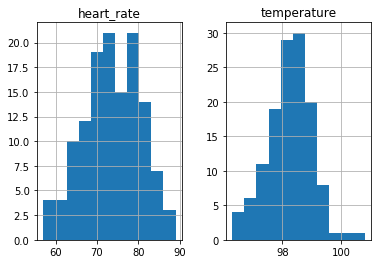

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# square root rule for no. of bins
n_bins = int(np.sqrt(df.shape[0]))

_ = df.hist(bins = n_bins)
plt.show()

### 1. Is the distribution of body temperatures normal? 

We will attempt to answer this using Frequentist methods such as **Hypothesis Testing**.
We will use the sample means as our test statistic.

**Null Hypothesis, H<sub>0</sub>:** There is no difference between means of **Male** and **Female** body temperatures.

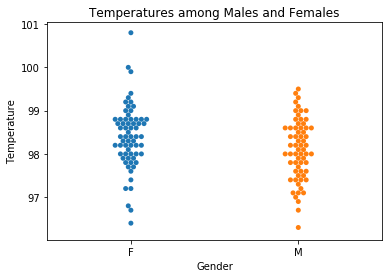

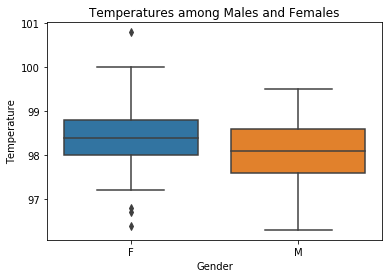

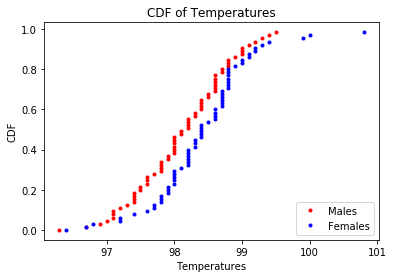

In [81]:
_ = sns.swarmplot(df['gender'], df['temperature'])
_ = plt.xlabel('Gender')
_ = plt.ylabel('Temperature')
_ = plt.title('Temperatures among Males and Females')
plt.show()

_ = sns.boxplot(df['gender'], df['temperature'])
_ = plt.xlabel('Gender')
_ = plt.ylabel('Temperature')
_ = plt.title('Temperatures among Males and Females')
plt.show()

# Arrays with Male temperatures
x_valsm = np.sort(df.temperature[df['gender'] == 'M'])
y_valsm = np.arange(0,len(x_valsm))/len(x_valsm)

# Arrays with Female temperatures
x_valsf = np.sort(df.temperature[df['gender'] == 'F'])
y_valsf = np.arange(0,len(x_valsf))/len(x_valsf)

_ = plt.plot(x_valsm, y_valsm, marker='.', linestyle = 'none', color='red')
_ = plt.plot(x_valsf, y_valsf, marker='.', linestyle = 'none', color='blue')
_ = plt.xlabel('Temperatures')
_ = plt.ylabel('CDF')
_ = plt.legend(('Males', 'Females'), loc='lower right')
_ = plt.title('CDF of Temperatures')
plt.show()

* Based on the ecdf seen above for the Temperatures in both males and females, it looks like they may be Normally distributed.
* There do seem to be some outliers in the Females' Temperature data.

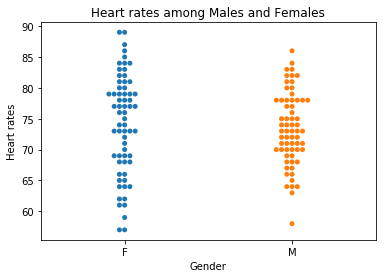

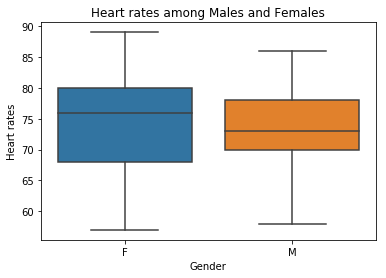

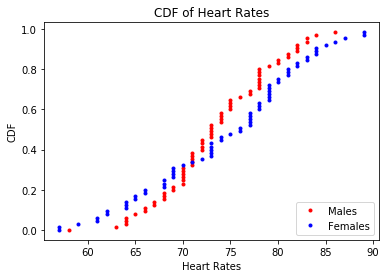

In [82]:
_ = sns.swarmplot(df['gender'], df['heart_rate'])
_ = plt.xlabel('Gender')
_ = plt.ylabel('Heart rates')
_ = plt.title('Heart rates among Males and Females')
plt.show()

_ = sns.boxplot(df['gender'], df['heart_rate'])
_ = plt.xlabel('Gender')
_ = plt.ylabel('Heart rates')
_ = plt.title('Heart rates among Males and Females')
plt.show()

# Arrays with Male heart rates
x_valsm = np.sort(df.heart_rate[df['gender'] == 'M'])
y_valsm = np.arange(0,len(x_valsm))/len(x_valsm)

# Arrays with Female heart rates
x_valsf = np.sort(df.heart_rate[df['gender'] == 'F'])
y_valsf = np.arange(0,len(x_valsf))/len(x_valsf)

_ = plt.plot(x_valsm, y_valsm, marker='.', linestyle = 'none', color='red')
_ = plt.plot(x_valsf, y_valsf, marker='.', linestyle = 'none', color='blue')
_ = plt.xlabel('Heart Rates')
_ = plt.ylabel('CDF')
_ = plt.legend(('Males', 'Females'), loc='lower right')
_ = plt.title('CDF of Heart Rates')
plt.show()

* Based on the ecdf seen above of heart rates between male and female, they look to be normally distributed, but the female heart rates seem to vary over a wider range, and crosses over the male heart rate distribution.

In [83]:
from scipy.stats import ttest_ind
from scipy.stats import t

# temperature means
# Male
temp_m = df.temperature[df['gender'] == 'M']
N_m = len(temp_m)
temp_mean_m = np.mean(temp_m)
print("Mean of Male Temperatures: ", temp_mean_m)
temp_std_m = np.std(temp_m)

# Female
temp_f = df.temperature[df['gender'] == 'F']
N_f = len(temp_f)
temp_mean_f = np.mean(temp_f)
print("Mean of Female Temperatures: ", temp_mean_f)
temp_std_f = np.std(temp_f)

print("We will choose an alpha of ")

degf = N_m + N_f - 2
t1 = (temp_mean_m - temp_mean_f)/np.sqrt((temp_std_m/N_m)+(temp_std_f/N_f))
p1 = 1 - t.cdf(t1,df=degf)
print(t1, p1)

# t and p-value using the scipy package
t2, p2 = ttest_ind(temp_m, temp_f)

print(t2, p2)
print("We get a p-value of 0.02, so we reject the Null hypothesis - given our alpha is 0.05")
print("We accept the Alternate hypothesis that there is a difference in the means.")

Mean of Male Temperatures:  98.1046153846154
Mean of Female Temperatures:  98.39384615384613
We will choose an alpha of 
-1.9492395704588628 0.9732730643351432
-2.2854345381656103 0.02393188312239561
We get a p-value of 0.02, so we reject the Null hypothesis - given our alpha is 0.05
We accept the Alternate hypothesis that there is a difference in the means.


### 2. Is the sample size large? Are the observations independent?

Answers:
* Yes, by CLT, since sample size is ? 30, we consider it a large sample size.
* Yes, the Male and Female temperature observations are independent of each other, and each temperature observation are in themselves indepedent from the other ones.
* The heart-rate and temperatures measure from each individual are not independent of each other. 

### 3. Is the true population mean really 98.6 degrees F?

To do this we will run a boostrap hypothesis test.

In [84]:
# Bootstrap hypothesis test
# Will use our data to sample and recreate a full dataset, the size of the origina. 
# We will repeat this a 100,000 times and plot a cdf. 
# Note that this will also be across Males and Females combined. No categoric differentiation.

temps = df.temperature.values

In [85]:
def bootstrappingEngine(data, func=np.mean):
    """Applies resampling to supplied data and calculates and returns the given 
    boostrap statistic specified by the supplied function, by default - mean"""
    
    resampled_arr = np.random.choice(data, size=len(data))
    
    return func(resampled_arr)

In [86]:
# apply bootstrapping 100,000 times.

resampled_means = []

for i in np.arange(0, 100_000):
    mean_i = bootstrappingEngine(temps, np.mean)
    resampled_means.append(mean_i)

In [87]:
len(resampled_means)

100000

In [88]:
np.mean(resampled_means)

98.24940628461538

In [89]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return (x,y)

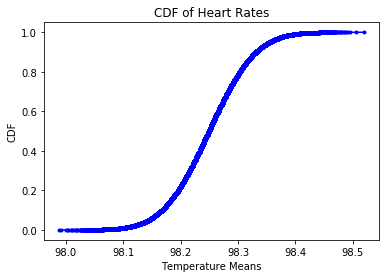

In [90]:
# Plotting the ecdf of the resampled means.
X_means, Y_means = ecdf(resampled_means)
_ = plt.plot(X_means, Y_means, marker='.', color='blue')
_ = plt.xlabel('Temperature Means')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Heart Rates')
plt.show()

Based on resampling and boostrapping, the means definitely look to be normally distributed, with a lower extended tail, over sampling 100,000 times. 

However, we're not sure of the true population mean being 98.6 F, but the mean of our resampled data appears to be 98.25 F.

* We would use a **one-sample test** because we are comparing the "sample" mean to the "population" mean 98.6 F.
* We would probably use the **t-statistic** for the following reasons:
    * we don't know the population std dev, but we know the population mean.
    * sample size is large enough, that normality assumptions are not as important anymore (even though they look to be normally distributed).

In [91]:
# We have the following data:
temps
sample_mean = np.mean(temps)
sample_std = np.std(temps)
pop_mean = 98.6
n = len(temps)
df = n - 1 
print("\n df: ", df)


 df:  129


In [92]:
# calculating the t value
t = (sample_mean - pop_mean)/(sample_std/np.sqrt(n))
t

-5.4759252020785585

the t critical value from the table = 1.658 approx. 
our value is way lower than that. So, in this case we accept the Null hypothesis: the sample mean does not differ from the population mean.

* Given that we are being asked to use **"the other"** test, we are supposed to use the **Z-statistic**, which we can use. Only that the population std dev will be an estimation from the sample std dev, since **sample size > 30**.
* We will consider an alpha = 0.05

In [93]:
# calculating the Z value
Z = (sample_mean - pop_mean)/(sample_std/np.sqrt(n))
Z

-5.4759252020785585

The Z-value also comes out to be the same value (as seen below, since we're using the sample's approximations).
This is not a feasible value to look through the table. Clearly, this is not the statistic to choose for this test.

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

This one again needs the t statistic since the sample size will be < 30.
We will again use alpha = 0.05

In [100]:
# resampling for 10 values from the original data.
resample_10 = np.random.choice(temps, size=10)
print(resample_10)
np.mean(resample_10)

[ 98.6  98.3  99.3  97.5  98.2 100.8  98.9  97.9  97.2  98.2]


98.49000000000001

In [101]:
# We have the following data
sample10_mean = np.mean(resample_10)
sample10_std = np.std(resample_10)
pop_mean = 98.6
n = len(resample_10)
df = n - 1 
print("\n df: ", df)


 df:  9


In [102]:
# calculating the t value
t = (sample10_mean - pop_mean)/(sample10_std/np.sqrt(n))
t

-0.35937351353829833

t value from the table is 1.833, which is greater than our calculated t-value. So we again accept the Null hypothesis.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
* As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

* Both males and females showed that 50% of their temperatures combinedly ranged between 97 and 99. We're going to say that temperatures below 97.5 and above 99 are to be considered abnormal. 

**Use Bootstrapping and Frequentist methods how? Doesn't make sense.**

### 6. Is there a significant difference between males and females in normal temperature?
* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.

* Used the two-sample t-test for independent samples because we proceed with the assumptions that:
    * The two sample groups (Males and Females) were derived independently of each other.
    * We were testing if their means were different from each other.

Conlusion: We did not reject the Null hypothesis. The two sample groups did test to be different from each other and coming from different populations. 